# Import Libraries and Dataset: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime as dt
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('MNC_Salaries.csv')
data.head()

,Name,Team,Number,Position,Age,DOJ,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


# Analysis of Dataset :

In [3]:
data.describe()

,Number,Age,Weight,Salary
count,457.000000,457.000000,457.000000,4.460000e+02
mean,17.678337,26.938731,221.522976,4.842684e+06
std,15.966090,4.404016,26.368343,5.229238e+06
min,0.000000,19.000000,161.000000,3.088800e+04
25%,5.000000,24.000000,200.000000,1.044792e+06
50%,13.000000,26.000000,220.000000,2.839073e+06
75%,25.000000,30.000000,240.000000,6.500000e+06
max,99.000000,40.000000,307.000000,2.500000e+07


1. Since there is some gap between 75% and max, there might be some outliers in columns : Number and Weight.
2. Salary is a continous variable, hence linear regression model can be used.
3. Mean > Median for Number and Salary column. Hence it is right skewed data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    int64  
 3   Position  457 non-null    object 
 4   Age       457 non-null    int64  
 5   DOJ       457 non-null    object 
 6   Weight    457 non-null    int64  
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(1), int64(3), object(5)
memory usage: 32.3+ KB


1. Columns: [ Team and Position ] is of object data type, so we need to use LabelEncoders to encode them.
2. Salary Column is of float and is of huge range. So divide the column by 1000 and convert it to integer data type. StandardScalar can also be used to normalize the data.
3. Looks like there are some null values in columns : [ College and Salary ]


Null values in College column :  84
Null values in Salary column  :  11


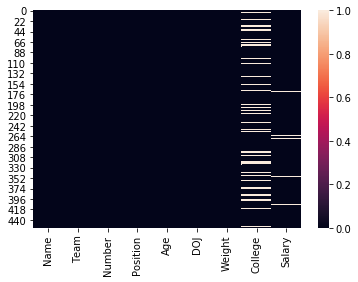

In [5]:
#Verification of Null values :
print("Null values in College column : ", data['College'].isnull().sum())
print("Null values in Salary column  : ", data['Salary'].isnull().sum())
sns.heatmap(data.isnull())

# Data Visualization : 

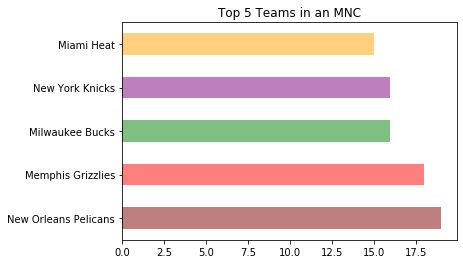

In [6]:
# Top 5 teams :
typesOfTeams = data['Team'].value_counts()
plt.title("Top 5 Teams in an MNC")
typesOfTeams[:5].plot.barh(color=['Maroon','Red','Green','purple','Orange'],alpha=0.5)


With this graph, we can find the teams that have large number of employees, which may imply that work load may be more and hence may get higher salary.

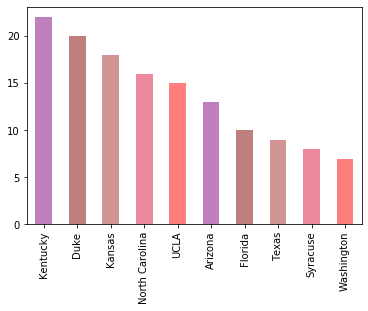

In [7]:
# Top 10 Colleges :
collegeList = data['College'].value_counts()
collegeList[:10].plot(kind='bar',color=['Purple','Maroon','Brown','Crimson','Red'],alpha=0.5)

This graph will help us to find the top colleges from which the employees have graduated.

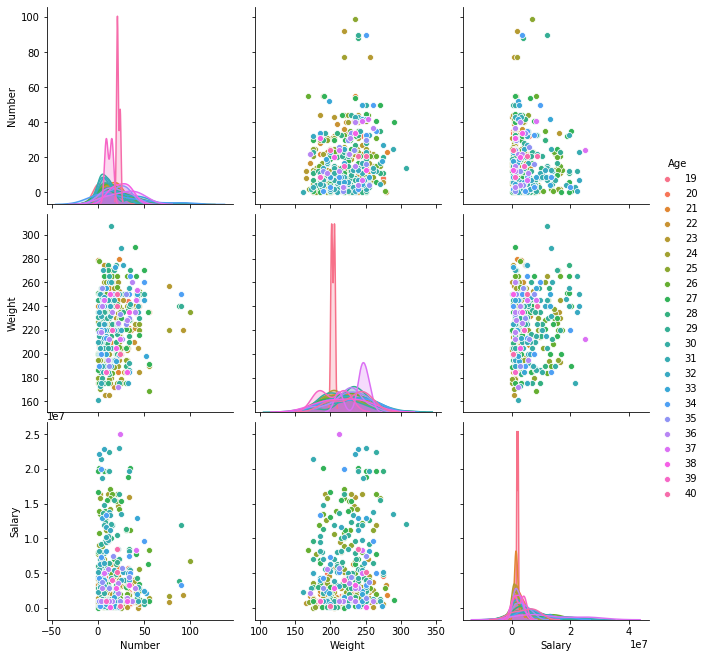

In [8]:
sns.pairplot(data,height=3.0,hue='Age')

# Data Pre-Processing

In [9]:
#Handle the null vallues : 
collegeModeValue = data['College'].mode() 
data['College']= data['College'].fillna('Kentucky')

#For Salary Column : 
salaryMean = data['Salary'].mean()
data['Salary'] = data['Salary'].fillna(salaryMean)


In [10]:
#Encoding : Since we have multiple labels we will use LabelEncoder()

from sklearn.preprocessing import LabelEncoder 

labelEncoder = LabelEncoder()
labelEncoder.fit(data['Team'])
data['Team'] = labelEncoder.transform(data['Team'])
#labelEncoder.classes_
labelEncoder = LabelEncoder()
labelEncoder.fit(data['Position'])
data['Position'] = labelEncoder.transform(data['Position'])
#print("Position Labels : ",labelEncoder.classes_)
labelEncoder = LabelEncoder()
labelEncoder.fit(data['College'])
data['College'] = labelEncoder.transform(data['College'])


In [11]:
#Salary - divide by thousand for better understanding : 
data['Salary (in thousand)'] = (data['Salary']/1000).round(3)

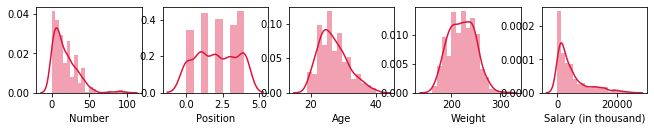

In [12]:
col = ['Number','Position','Age','Weight','Salary (in thousand)']
plt.figure(figsize=(20,30))
for i in range(0,len(col)):
    plt.subplot(16,9,i+1)
    sns.distplot(data[col[i]],color='crimson')
plt.show()

In [13]:
data.drop('Salary',inplace=True,axis=1)
data.drop('Name',axis=1,inplace=True)
data.drop('DOJ',axis=1,inplace=True)
data.drop('Number',axis=1,inplace=True)

#Think about what to do with DOJ

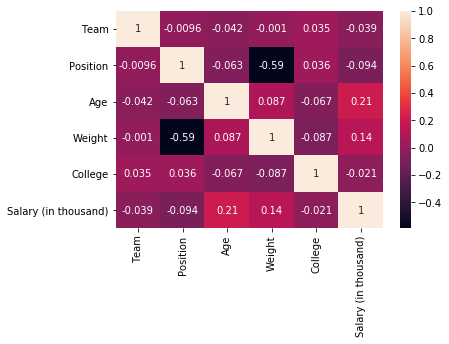

In [14]:
#Correlation between the variables :
data_corr = data.corr()
sns.heatmap(data_corr,annot=True)

In [15]:
data.skew()


Team                   -0.007368
Position               -0.014795
Age                     0.626349
Weight                  0.113788
College                 0.261126
Salary (in thousand)    1.595511
dtype: float64

In [16]:
#To remove skewness :
#data['Number'] = np.sqrt(data['Number'])
#data['Salary (in thousand)'] = np.sqrt(data['Salary (in thousand)'])
data['Salary (in thousand)'] = np.log(data['Salary (in thousand)'])
data['Age'] = np.sqrt(data['Age'])
data.skew()

Team                   -0.007368
Position               -0.014795
Age                     0.447758
Weight                  0.113788
College                 0.261126
Salary (in thousand)   -0.450096
dtype: float64

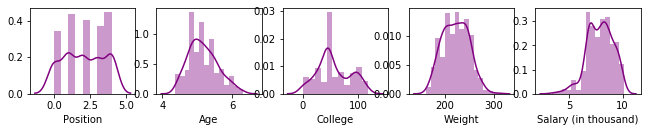

In [17]:
#After removing skewness :
col = ['Position','Age','College','Weight','Salary (in thousand)']
plt.figure(figsize=(20,30))
for i in range(0,len(col)):
    plt.subplot(16,9,i+1)
    sns.distplot(data[col[i]],color='purple')
plt.show()

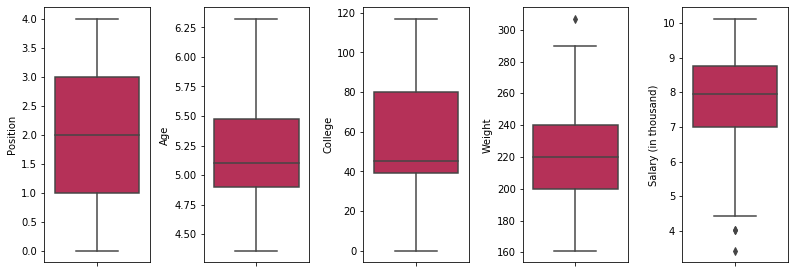

In [18]:
#Check for outliers :
plt.figure(figsize=(20,60))
for i in range(0,len(col)):
    plt.subplot(16,9,i+1)
    sns.boxplot(data[col[i]],palette='rocket',orient='v')
    plt.tight_layout()


In [19]:
#Use z-score to remove outliers :
from scipy.stats import zscore
#data.info()
z=np.abs(zscore(data))
#print(np.where(z>3))
data_new = data[(z<3).all(axis=1)]
#print(data.shape)
#print(data_new.shape)

# Model Selection : 

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler 



X= data_new.drop('Salary (in thousand)',axis=1)
y = data_new.iloc[:,-1:]

y.head()

,Salary (in thousand)
0,8.952908
1,8.824107
2,8.485224
3,7.046334
4,8.517193


In [21]:
scaler = StandardScaler()
scaler.fit(X)
X_new = scaler.transform(X)
X_new = pd.DataFrame(X_new)

scaler.fit(y)
y_new = scaler.transform(y)
y_new = pd.DataFrame(y_new)

max_r2_score=0
for i in range(0,201):
    x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.20,random_state=i)
    lm = LinearRegression()
    lm.fit(x_train,y_train)
    y_pred = lm.predict(x_test)
    score = r2_score(y_test,y_pred)
    #print(i," : ", score)
    if score>max_r2_score:
        max_r2_score = score
        final_state = i
        
print("Best score for random state ",final_state," is : ",max_r2_score)
    

Best score for random state  159  is :  0.12184034389865528


# Model Prediction : 

In [22]:
#Linear Regression :
x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.20,random_state=159)
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)

print("R2 Score : ",r2_score(y_test,y_pred)) 


R2 Score :  0.12184034389865528


In [23]:
#Cross Validation :
from sklearn.model_selection import cross_val_score

cv_score = cross_val_score(lm,X_new,y_new,cv=5,scoring='r2')
print("Cross Validation Score : ", cv_score.mean())


Cross Validation Score :  0.03323666648874015


In [24]:
#Regularozation :
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge,ElasticNet

lasso = Lasso()
ridge = Ridge()
elasticnet = ElasticNet()
parameters = {'alpha':[0.001, 0.01,0.02,0.03,0.04, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100]}

model = [lasso,ridge,elasticnet]

score = -1
for each in range(len(model)):
    cv = GridSearchCV(model[each],parameters,scoring='r2',cv=5)
    cv.fit(x_train,y_train)
    cvScore =  cv.best_score_
    parameter = cv.best_params_
    if cvScore > score:
        score=cvScore
        final_parameter = parameter
        final_model = model[each]

        
print("Best parameter for ",final_model," : \n",final_parameter,"\n with score : ", cvScore)

Best parameter for  Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)  : 
 {'alpha': 0.08} 
 with score :  -0.00012461499545093346


In [25]:
#From the Grid Search we found that Ridge worked better with alpha as 0.02
#x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.20,random_state=159)
lr = Ridge(alpha=0.02)
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

print("R2 Score : ",r2_score(y_test,y_pred)) 

R2 Score :  0.12183710723094354


In [26]:
from sklearn.svm import SVR


kernel_list = ['linear','rbf','poly']
for i in range(len(kernel_list)):
    sv=SVR(kernel_list[i])
    sv.fit(x_train,y_train)
    score  = sv.score(x_train,y_train)
    print("Score for ",kernel_list[i]," is : ", score)



Score for  linear  is :  0.015262038338534345
Score for  rbf  is :  0.1831138575670546
Score for  poly  is :  0.06920984039618483


In [27]:
parameters = {'C':[0.1, 1,10,50,100],'kernel':kernel_list}
svr=SVR()
cv = GridSearchCV(svr,parameters)
cv.fit(x_train,y_train)
sorted(cv.cv_results_.keys())
print("Best parameters : ", cv.best_params_)
print("Best Score      : ", cv.best_score_)

Best parameters :  {'C': 0.1, 'kernel': 'rbf'}
Best Score      :  0.012133776973294274


In [28]:
#SVR
#x_train,x_test,y_train,y_test = train_test_split(X,y_new,test_size=0.20,random_state=47)
svr = SVR('rbf',C=1)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_test)

print("R2 Score : ",r2_score(y_test,y_pred)) 


R2 Score :  0.189667883321338


In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=[1,2,3,4,5]

for i in range(len(degree)):
    polyreg=make_pipeline(PolynomialFeatures(degree[i]),LinearRegression())
    polyreg.fit(x_train,y_train)
    y_pred = polyreg.predict(x_test)

    print("Degree : ",degree[i],", Score : ",r2_score(y_test,y_pred)) 


Degree :  1 , Score :  0.12184034389865528
Degree :  2 , Score :  0.1581943725277083
Degree :  3 , Score :  0.04426679597441885
Degree :  4 , Score :  -0.8369631383576364
Degree :  5 , Score :  -32.68759575141474


In [30]:
#Ensemble technique:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(n_estimators=100,random_state=124)
ada.fit(x_train, y_train)
y_pred = ada.predict(x_test)

ada.score(x_test,y_test)
#calMaxScore(ada)

0.13877541619196476

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

#X, y = make_regression(random_state=0)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = GradientBoostingRegressor(n_estimators=100,random_state=13)
#calMaxScore(reg)

reg.fit(x_train, y_train)
reg.predict(x_test)

reg.score(x_test, y_test)

0.06944231378750909

In [32]:
#Better model than the rest : 

svr = SVR('rbf',C=1)
svr.fit(x_train,y_train)
y_predfinal = svr.predict(x_test)

print("R2 Score            : ",r2_score(y_test,y_pred)) 
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error  : ",mean_squared_error(y_test,y_pred))

R2 Score            :  0.13877541619196476
Mean Absolute Error :  0.7153164808570416
Mean Squared Error  :  0.7890171209609983


In [33]:
np.array(y_predfinal)[:10]

array([-0.51450331,  0.6993957 , -0.34778028, -0.57762968, -0.38548265,
       -0.93764906, -0.22910061,  0.47085335,  0.12565658,  0.24358291])

In [34]:
np.array(y_test)[:10].reshape(1,-1)

array([[ 0.56597816,  0.52366858, -1.0179826 , -1.31496972,  0.54735083,
        -2.77670948, -0.67679935, -0.57065434,  0.49594605,  0.08069367]])